# <a> Classificação </a>

Problemas relacionados à classificação sempre estiveram presentes num contexto financeiro e empresarial. Classificar transações bancárias como fraudulentas ou não, ou até mesmo prever o sentido (positivo ou negativo) da variação do preço de determinado ativo são apenas dois dos diversos casos em que tal abordagem é extremamente útil.

O que caracteriza os casos acima como problemas de classificação é o fato da variável dependente ser discreta. Em cada uma das situações descritas há apenas duas classes, mas este não é um fator limitante para os problemas de classificação, existindo, também, a possibilidade de prever uma variável discreta num contexto multiclasse. 

# <a> Visão Geral - Previsão de Churn no Setor de Telecomunicações </a>

A previsão de churn, em termos empresariais, refere-se à capacidade de uma organização antecipar e prever quais clientes estão em risco de deixar de utilizar os produtos ou serviços oferecidos pela empresa. O termo "churn" é usado para descrever a perda de clientes ou a taxa de cancelamento. Essa previsão é fundamental para as estratégias de retenção de clientes, pois permite que a empresa identifique os fatores que levam os clientes a saírem e tome medidas proativas para mitigar esse risco.

É nesse sentido que a previsão de churn pode gerar valor numa empresa: 
 * Incremento na receita por meio de uma maior retenção de clientes
 * Redução de custo de aquisição de novos clientes
 * Melhoria da satisfação do cliente por meio de maior atenção para os indicativos de churn

A previsão de churn se enquadra num problema de classificação pois é necessário que se tenham as informações acerca do estado do cliente: se deixou os serviços da empresa, ou não. Em virtude deste mesmo fato, também é nítido que o problema analisado se ajusta ao aprendizado de máquina supervisionado.

O presente projeto trata da previsão de churn numa empresa de telecomunicações. A base de dados utilizada pode ser obtida no [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) e se trata de uma empresa telefônica fictícia com dados demográficos e de serviços contratados pelos clientes com a informação se estes saíram ou não da empresa.

# <a> Objetivos </a>

Este trabalho conta com dois principais objetivos: 
1) Prever quais clientes são mais propensos a deixar os serviços da empresa de telefonia.
2) Extrapolar os resultados da base de dados utilizada e demonstrar como a previsão de churn tem alta capacidade de gerar valor em diversos segmentos.

Este projeto foi construído durante a formação da "Let's Data" - Jornada Cientista de Dados - https://www.letsdata.ai

In [1]:
# Importando bibliotecas necessárias 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

# Configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Configuração do pandas para não mostrar notação científica para números
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Lendo os dados
df_customers = pd.read_csv("./data/raw data/train.csv")
df_customers.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [3]:
# Visualizando as colunas do dataframe
df_customers.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Cada linha representa uma instância de dados, que nesse caso corresponde a um cliente. Dessa forma, todos os ID's são únicos.

In [4]:
# Verificando a afirmativa acima
df_customers['id'].is_unique

True

## <a> Dicionário de Dados </a>

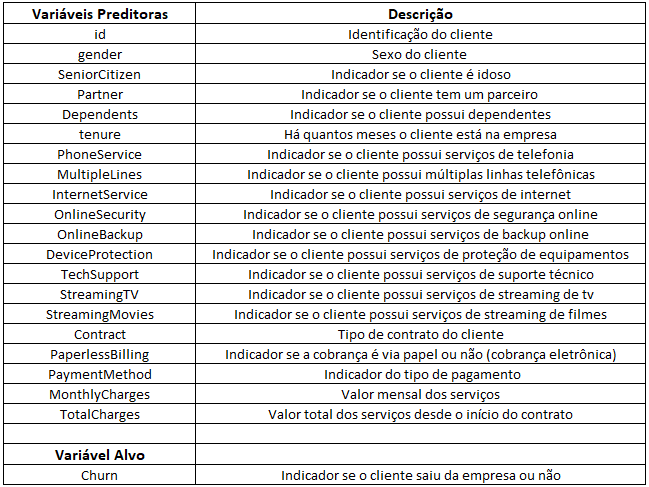

## <a> Manipulação de Dados Inicial </a>

In [5]:
# Visualizando os dados (coluna id pode ser utilizada como índice)
df_customers.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [6]:
# Setando a coluna 'id' como índice do DataFrame
df_customers = df_customers.set_index('id')
df_customers.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [7]:
# Criando função para mostrar dimensões, tipos de coluna e demais informações do DataFrame
def informacao(dataframe):
    print(f"As dimensões do DataFrame são: {(dataframe.shape[0])} linhas e {(dataframe.shape[1])} colunas")
    print("\n")
    print(f"As colunas do DataFrame e seus tipos são:\n\n{dataframe.dtypes}")
    print("\n")
    print("Demais informações sobre o DataFrame: \n")
    dataframe.info()

In [8]:
# Chamando a função
informacao(df_customers)

As dimensões do DataFrame são: 5634 linhas e 20 colunas


As colunas do DataFrame e seus tipos são:

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object


Demais informações sobre o DataFrame: 

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 4030 to 103
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null  

In [9]:
# A feature 'TotalCharges' possui tipo 'object', mas deveria possuir tipo 'float'
df_customers['TotalCharges'].dtype

dtype('O')

In [10]:
# Criando função para checar valores das features
def valores(feature):
    return df_customers[f'{feature}'].value_counts()

In [11]:
# Chamando a função (20 primeiras saídas)
valores('TotalCharges').head(20)

TotalCharges
20.2     8
         8
19.55    7
19.75    6
19.9     6
19.45    6
19.65    6
20.05    6
20.25    6
45.3     5
20.15    5
44.4     4
69.6     4
20.3     4
50.15    4
19.3     4
44       4
20.45    4
19.2     4
69.65    4
Name: count, dtype: int64

Há alguns valores em branco, essa pode ser a causa dessa feature estar com tipo 'object'. A fim de tratar este problema, utilizaremos expressões regulares.

In [12]:
# Atualizando a feature 'TotalCharges' para que os valores com espaços sejam substituídos por um nome 'vazio', tal qual a string "".
# \s significa qualquer caractere de espaço, enquanto \s+ significa um ou mais espaços
df_customers['TotalCharges'] = df_customers['TotalCharges'].replace("\s+", "", regex = True)

In [13]:
# Chamando a função novamente
valores('TotalCharges').head(20)

TotalCharges
20.2     8
         8
19.55    7
19.75    6
19.9     6
19.45    6
19.65    6
20.05    6
20.25    6
45.3     5
20.15    5
44.4     4
69.6     4
20.3     4
50.15    4
19.3     4
44       4
20.45    4
19.2     4
69.65    4
Name: count, dtype: int64

In [14]:
# Verificando novamente o tipo da feature
df_customers['TotalCharges'].dtype

dtype('O')

Os valores continuam ali, mas foram substituídos por uma string vazia "". No entanto, ainda é necessário converter tais valores para 'float'.

Como os valores que queremos converter são de strings vazias ("") para float, o método 'astype()' apresentará erros. Sendo assim, utilizaremos o método 'to_numeric()'.

In [15]:
# Filtrando as linhas em que a feature 'TotalCharges' é uma string vazia e não pode ser convertida para float
df_customers.loc[df_customers['TotalCharges'] == "", :]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
6755,Male,0,No,Yes,0.00,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,0
5219,Male,0,Yes,Yes,0.00,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6671,Female,0,Yes,Yes,0.00,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0
937,Female,0,Yes,Yes,0.00,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
3827,Male,0,Yes,Yes,0.00,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
1083,Male,0,Yes,Yes,0.00,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
3332,Male,0,Yes,Yes,0.00,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
1341,Female,0,Yes,Yes,0.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0


In [16]:
# É interessante utilizar o método 'to_numeric()' pois podemos utilizar o parâmetro 'errors' como 'coerce' a fim de forçar a barra pra converter as
# strings vazias em float
pd.to_numeric(df_customers['TotalCharges'], errors = 'coerce').head(20)

id
4030   2560.10
6731    332.65
6479   6640.70
6861   3545.35
3266   1974.80
6368   3442.80
5830   1848.80
4476     61.05
1508   1008.70
2921   6155.40
3145    110.15
333    4422.95
2140    458.10
3427     69.80
3379   6033.10
3163   1394.55
6471    345.50
2350   6565.85
3756    318.90
305    3141.70
Name: TotalCharges, dtype: float64

In [17]:
# Selecionando os índices de onde o valor de 'TotalCharges' é uma string vazia 
indice_totalcharges_vazio = df_customers.loc[df_customers['TotalCharges'] == "", :].index
indice_totalcharges_vazio

# Visualizando como o método 'to_numeric()' converteria as linhas em que o valor de 'TotalCharges' era uma string vazia
pd.to_numeric(df_customers['TotalCharges'], errors = 'coerce')[indice_totalcharges_vazio]

id
6755   NaN
5219   NaN
6671   NaN
937    NaN
3827   NaN
1083   NaN
3332   NaN
1341   NaN
Name: TotalCharges, dtype: float64

Já tendo verificado como as mudanças ficariam, é hora de converter, de fato, a feature 'TotalCharges' para float

In [18]:
# Convertendo para 'NaN' (Not a number)
df_customers['TotalCharges'] = pd.to_numeric(df_customers['TotalCharges'], errors = 'coerce')

# Visualizando se há alguma linha em que a string vazia permanece na feature 'TotalCharges'
df_customers.loc[df_customers['TotalCharges'] == "", :]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,


In [19]:
# Chamando a função mais uma vez
valores('TotalCharges').head(20)

TotalCharges
20.20    8
19.55    7
20.25    6
19.65    6
19.90    6
19.45    6
20.05    6
19.75    6
45.30    5
20.15    5
44.40    4
20.30    4
50.15    4
19.30    4
44.00    4
69.60    4
20.45    4
19.20    4
69.65    4
74.35    3
Name: count, dtype: int64

In [20]:
# Verificando o tipo de todas as features novamente. 'TotalCharges' está como 'float' 
df_customers.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

## <a> Análise Exploratória de Dados </a>